In [1]:
import sys
import pandas as pd
import numpy as np


In [2]:
sys.path.append("../")


In [3]:
import biobss


In [4]:
import neurokit2 as nk
sample_data = pd.read_pickle("..\sample_data\\EDA_Chest.pkl")
sample_data = sample_data.flatten()


In [5]:
decompose = biobss.pipeline.Bio_Process(
    process_method=biobss.edatools.eda_decompose, modality="EDA", sigtype="EDA", method="highpass")
normalize = biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.normalize_signal, modality="EDA", sigtype="EDA")
resample = biobss.pipeline.Bio_Process(
    process_method=biobss.signaltools.resample_signal_object, modality="EDA", sigtype="EDA", target_sample_rate=350)
signal_features = biobss.pipeline.Feature(name="signal_features", function=biobss.edatools.signal_features.get_signal_features, parameters={
                                           "modality": "EDA", "sigtype": "EDA"}, input_signals={'EDA_Raw':'EDA_Raw', 'EDA_Tonic':'EDA_Tonic', 'EDA_Phasic':'EDA_Phasic'})
stat_features = biobss.pipeline.Feature(name="stat_features", function=biobss.common.stat_features.get_stat_features, parameters={
                                         "modality": "EDA", "sigtype": "EDA"}, input_signals={'EDA_Raw':'EDA_Raw', 'EDA_Tonic':'EDA_Tonic', 'EDA_Phasic':'EDA_Phasic'})
corr_features = biobss.pipeline.Feature(name="corr_features", function=biobss.common.correlation_features, parameters={
                                        "modality": "EDA", "sigtype": "EDA","signal_names":['EDA_Raw','EDA_Tonic','EDA_Phasic']}, input_signals={'EDA':['EDA_Raw','EDA_Tonic','EDA_Phasic']})


In [6]:
pipe = biobss.pipeline.Bio_Pipeline(modality="EDA", sigtype="EDA", windowed_process=True,
                                    window_size=60, step_size=30, features_list=[])


In [7]:
pipe.preprocess_queue.add_process(normalize)
pipe.process_queue.add_process(decompose)
pipe.process_queue.add_process(resample)
pipe.add_feature_step(signal_features)
pipe.add_feature_step(stat_features)
pipe.add_feature_step(corr_features)


In [8]:
pipe.feature_list

In [9]:
pipe.set_input(sample_data, 700, name="EDA_Raw", modality="EDA")


In [10]:
pipe.input


Signal object with 1 channel(s)
EDA_Raw (EDA) (700Hz) ((5920.0,)s) (1 windows) ((4144000,))

In [11]:
pipe


Bio_Pipeline:
	Modality: EDA
	Signal Type: EDA
	Preprocessors: Process list:
	1: normalize_signal

	Processors: Process list:
	1: eda_decompose
	2: resample_signal_object

	Postprocessors: Process list:

	Window Size(Seconds): 60
	Step Size: 30

In [12]:
pipe.run_pipeline()


c:\Users\Cagatay\Desktop\Workspace\Biobss Pipeline\biobss\examples\..\biobss\pipeline\bio_process.py:54: UserWarning: Vectorized method failed. Trying scalar method. It may be significantly slower.
  warnings.warn(


In [13]:
pipe.input


Signal object with 7 channel(s)
EDA_Raw (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))
EDA_Tonic (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))
EDA_Phasic (EDA) (350Hz) (60.0s) (196 windows) ((196, 21000))

In [14]:
pipe.extract_features()


In [15]:
pipe.features


,EDA_Raw_rms,EDA_Raw_acr_length,EDA_Raw_integral,EDA_Raw_average_power,EDA_Tonic_rms,EDA_Tonic_acr_length,EDA_Tonic_integral,EDA_Tonic_average_power,EDA_Phasic_rms,EDA_Phasic_acr_length,...,EDA_Phasic_std,EDA_Phasic_max,EDA_Phasic_min,EDA_Phasic_range,EDA_Phasic_kurtosis,EDA_Phasic_skew,EDA_Phasic_momentum,EDA_RawEDA_Tonic_correl,EDA_RawEDA_Phasic_correl,EDA_TonicEDA_Phasic_correl
0.0,1.307888,20999.749871,27433.892859,1.710571,1.311076,20999.001564,27521.421577,1.718920,0.025634,20999.746891,...,0.025633,0.143630,-0.101067,0.244696,4.371252,0.426744,0.000657,0.906281,0.564965,0.199536
30.0,1.198245,20999.691437,25031.102031,1.435790,1.197131,20999.004374,25019.863000,1.433123,0.030386,20999.689296,...,0.030385,0.152175,-0.103795,0.255970,2.611807,0.666712,0.000923,0.968859,0.316593,0.090156
60.0,1.129678,20999.747814,23684.427371,1.276173,1.125653,20999.001188,23616.223917,1.267094,0.023762,20999.745641,...,0.023745,0.131572,-0.085946,0.217517,2.650300,1.223677,0.000564,0.933856,0.559383,0.234547
90.0,1.269795,20999.845415,26563.982437,1.612380,1.268518,20999.005008,26540.613767,1.609139,0.016334,20999.839103,...,0.016319,0.088144,-0.125289,0.213434,2.758980,0.444666,0.000266,0.990459,0.159469,0.027017
120.0,1.403914,20999.756391,29464.026703,1.970973,1.404069,20999.001828,29467.650137,1.971409,0.007404,20999.755139,...,0.007404,0.057759,-0.133979,0.191737,9.228124,-0.142350,0.000055,0.988241,0.166968,0.016125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730.0,0.890785,20999.227503,18704.470559,0.793498,0.891568,20999.000001,18721.882657,0.794893,0.007824,20999.227512,...,0.007808,0.056355,-0.070464,0.126818,0.928234,0.257044,0.000061,0.795176,0.720952,0.168890
5760.0,0.896704,20999.279074,18829.164693,0.804078,0.896852,20999.000001,18833.171051,0.804344,0.007426,20999.279074,...,0.007425,0.065335,-0.089886,0.155221,3.106648,0.170558,0.000055,0.784588,0.746041,0.172848
5790.0,0.890915,20999.286985,18707.290795,0.793729,0.890937,20999.000000,18708.676344,0.793769,0.007490,20999.286989,...,0.007480,0.065425,-0.090578,0.156003,3.347182,0.229350,0.000056,0.790777,0.714396,0.149913
5820.0,0.916721,20999.240598,19201.646324,0.840378,0.913044,20999.002380,19139.088812,0.833649,0.012244,20999.235660,...,0.012243,0.059512,-0.084919,0.144431,1.494219,-0.467546,0.000150,0.974681,0.282675,0.093617


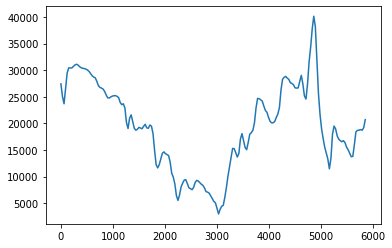

In [17]:
import matplotlib.pyplot as plt
plt.plot(pipe.features['EDA_Raw_integral'])


In [18]:
pipe.features['EDA_Raw_acr_length']

0.0       20999.749871
30.0      20999.691437
60.0      20999.747814
90.0      20999.845415
120.0     20999.756391
              ...     
5730.0    20999.227503
5760.0    20999.279074
5790.0    20999.286985
5820.0    20999.240598
5850.0    20999.166637
Name: EDA_Raw_acr_length, Length: 196, dtype: float64